# Decision Tree

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import os

In [2]:
"""1. class: normal find, metastases, malign lymph, fibrosis 
2. lymphatics: normal, arched, deformed, displaced 
3. block of affere: no, yes 
4. bl. of lymph. c: no, yes 
5. bl. of lymph. s: no, yes 
6. by pass: no, yes 
7. extravasates: no, yes 
8. regeneration of: no, yes 
9. early uptake in: no, yes 
10. lym.nodes dimin: 0-3 
11. lym.nodes enlar: 1-4 
12. changes in lym.: bean, oval, round 
13. defect in node: no, lacunar, lac. marginal, lac. central 
14. changes in node: no, lacunar, lac. margin, lac. central 
15. changes in stru: no, grainy, drop-like, coarse, diluted, reticular, stripped, faint, 
16. special forms: no, chalices, vesicles 
17. dislocation of: no, yes 
18. exclusion of no: no, yes 
19. no. of nodes in: 0-9, 10-19, 20-29, 30-39, 40-49, 50-59, 60-69, >=70 

"""

names = ['class', 'lymphatics','block of affere','bl. of lymph. c','l. of lymph. s',
    'by pass','extravasates','regeneration of','early uptake in','lym.nodes dimin','lym.nodes enlar','changes in lym.',
   'defect in node','changes in node','changes in stru','special forms','dislocation of','exclusion of no','no. of nodes in'] #column names for the data

In [3]:
len(names)

19

In [4]:
data = pd.read_csv("Lympography.csv", names = names) #reading csv file of the data

In [5]:
data.head() #printing head of the data 

,class,lymphatics,block of affere,bl. of lymph. c,l. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [6]:
#data.isnull().sum() #checking for the null values in the data

In [7]:
data.shape #finding shape for the data

(148, 19)

Allocating the attribues and the labels for the data

In [8]:
X = data.iloc[:, 0:].values #features
y = data.iloc[:, 0].values #labels

In [9]:
np.unique(y)

array([1, 2, 3, 4], dtype=int64)

Training, testing and spliting the data

In [10]:
from sklearn.model_selection import train_test_split #splitting our data into the parts like train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0) #we are giving X-->Features, Y--> Labels
#Test size refers to the how much should be the data for the test and the train
#random state takes data randomly if we gaiven any number like 10, 20 or if you 0 it will take data in sequence way

Scaling the data from 0 to 1

In [11]:
from sklearn.preprocessing import StandardScaler #standard scaler the function is used to bring different range data into same range
sc = StandardScaler() #this function creating the variable
X_train = sc.fit_transform(X_train) #fitting into the standard scaler for train data
X_test = sc.transform(X_test) #fitting for the test data

applying dimension reductionality to the data to gain best information from it

In [12]:
from sklearn.decomposition import PCA #principle component analysis
pca = PCA() #n components says about the how many pca should take like p1 and p2
X_train = pca.fit_transform(X_train) #X_train is fitting into the pca and it will gain infor mation 
#from the algo and form s the new column 
X_test = pca.transform(X_test) #same for the test data

Tuning the with help of the Grid search

In [13]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion' : ['gini', 'entropy'], #Criterion of the model 
    'max_depth' : [1,3, 4, 5, 8, 9, 11, 14, 15,], #max_depth for the model 
    'random_state' : [0,10, 15, 16, 17, 19, 20] #random state takes data randomly if we gaiven any number like 10, 20 or 
    #if you 0 it will take data in sequence way
}

In [14]:
from sklearn.tree import DecisionTreeClassifier #Decision tree classiifer is the 
dtc = DecisionTreeClassifier()

Passing into the model to find the best parameter from the model

In [15]:
grid_search = GridSearchCV(estimator=dtc, #estimator says about the model 
                          param_grid=parameters, #parameter grid takes all the parameters into the grid
                          cv=10)#CV say about the k - folds cross validation here k says the number

fitting the data into the model for the test case

In [16]:
grid_search.fit(X_train, y_train) #fitting the data into the model for the training 

D:\Anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [1, 3, 4, 5, 8, 9, 11, 14, 15], 'random_state': [0, 10, 15, 16, 17, 19, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

Finding the best estimator for the data

In [17]:
grid_search.best_estimator_ #it will give best estimators from the given parameters on the data 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=16,
            splitter='best')

Predicting the data for the testcase

In [18]:
y_pred = grid_search.predict(X_test) #it will predict test data 

Finding accuracy for the Train case

In [19]:
from sklearn.metrics import accuracy_score #accuracy score is the function taken from the merices classes
print("Test Accuracy Score :- ", accuracy_score(y_test, y_pred)) #best accuracy for the test 
print("Train Accuracy Score :- ", accuracy_score(y_train, grid_search.predict(X_train))) #best accuracy for the train

Test Accuracy Score :-  0.8666666666666667
Train Accuracy Score :-  1.0


In [20]:
from sklearn.metrics import confusion_matrix #confusion matrix for the data
c = confusion_matrix(y_pred, y_test)

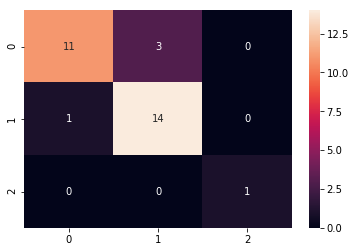

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
x = sns.heatmap(c, annot = True, fmt = "d") #plotting heatmap for the confusion
plt.show()